### EXPLORATORY DATA ANALYSIS - TRAINING DATA

Now that we've formatted and extracted the features we would like to analyze from BigQuery, we need to take a closer look at our dataset to see if there are any interesting trends in the data.

In [1]:
# Load the "autoreload" extension
#%load_ext autoreload

#reload extension
%reload_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

#Import all the necessary packages for modules
import os
import sys

#add the 'python' directory as one where we can import modules
py_dir = os.path.join(os.getcwd(), 'python')
sys.path.append(py_dir)

# import my method from the source code
from python.get_info import get_missing_data, plot_hists

#Import all necessary packages for visualization and transformation of the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train_20170701_to_20170731', index_col=0)       

### OVERVIEW

In [3]:
train.head()

,visitor_id,day0_time_on_site_seconds,day1_time_on_site_seconds,day2_time_on_site_seconds,day3_time_on_site_seconds,day4_6_time_on_site_seconds,w2_time_on_site_seconds,day0_hits,day1_hits,day2_hits,...,day3_sessions,day4_6_sessions,w2_sessions,day0_session_quality,day1_session_quality,day2_session_quality,day3_session_quality,day4_6_session_quality,w2_session_quality,label
0,3092487309701391768,570.0,NaN,1021.0,NaN,NaN,533.0,26.0,NaN,6.0,...,NaN,NaN,2.0,60.0,NaN,3.0,NaN,NaN,1.5,1
1,780253600713375371,705.0,NaN,NaN,NaN,NaN,1181.0,58.0,NaN,NaN,...,NaN,NaN,1.0,85.0,NaN,NaN,NaN,NaN,79.0,1
2,953713676730854570,373.0,NaN,NaN,NaN,NaN,736.0,42.0,NaN,NaN,...,NaN,NaN,1.0,76.0,NaN,NaN,NaN,NaN,65.0,1
3,238925310298938861,1919.0,NaN,NaN,NaN,14.0,691.0,74.0,NaN,NaN,...,NaN,1.0,2.0,79.0,NaN,NaN,NaN,1.0,43.5,1
4,1090774782213816251,2405.0,NaN,NaN,NaN,0.0,454.0,33.0,NaN,NaN,...,NaN,1.0,2.0,87.0,NaN,NaN,NaN,1.0,3.0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19964 entries, 0 to 19963
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   visitor_id                   19964 non-null  uint64 
 1   day0_time_on_site_seconds    3855 non-null   float64
 2   day1_time_on_site_seconds    2800 non-null   float64
 3   day2_time_on_site_seconds    2506 non-null   float64
 4   day3_time_on_site_seconds    2532 non-null   float64
 5   day4_6_time_on_site_seconds  5570 non-null   float64
 6   w2_time_on_site_seconds      13358 non-null  float64
 7   day0_hits                    3855 non-null   float64
 8   day1_hits                    2800 non-null   float64
 9   day2_hits                    2506 non-null   float64
 10  day3_hits                    2532 non-null   float64
 11  day4_6_hits                  5570 non-null   float64
 12  w2_hits                      13358 non-null  float64
 13  day0_pageViews  

We can see from the info that most of the data types are floats. We need to change __visitor_id__ and __label__ to object types as these represent categorical features rather than integers.

In [5]:
train = train.astype({'visitor_id':'object'})
#check that the data type has been changed to a categorical feature
train[['visitor_id', 'label']].dtypes

visitor_id    object
label          int64
dtype: object

### MISSING DATA

Let's look at how much missing data we have and confirm that we only have unique visitor ids with one label. 

In [6]:
#Confirm unique visitors matches the number of rows in the data
len(train.visitor_id.unique())

19964

In [7]:
get_missing_data(train)

% of Missing Data:
visitor_id                      0.00
day0_time_on_site_seconds      80.69
day1_time_on_site_seconds      85.97
day2_time_on_site_seconds      87.45
day3_time_on_site_seconds      87.32
day4_6_time_on_site_seconds    72.10
w2_time_on_site_seconds        33.09
day0_hits                      80.69
day1_hits                      85.97
day2_hits                      87.45
day3_hits                      87.32
day4_6_hits                    72.10
w2_hits                        33.09
day0_pageViews                 80.69
day1_pageViews                 85.97
day2_pageViews                 87.45
day3_pageViews                 87.32
day4_6_pageViews               72.10
w2_pageViews                   33.09
day0_bounces                   80.69
day1_bounces                   85.97
day2_bounces                   87.45
day3_bounces                   87.32
day4_6_bounces                 72.10
w2_bounces                     33.09
day0_sessions                  80.69
day1_sessions      

There is a lot of missing data, but this is normal because users do not interact with a website everyday. We don't want to fill this information or delete it as the missing data is important to understanding the behavior of each user.

### DISTRIBUTION

In [8]:
#Calculate distribution ratio between labels
train.label.value_counts()/len(train)

0    0.951713
1    0.048287
Name: label, dtype: float64

Based on the ratio between no transactions and confirmed transactions we can see that user transactions only make up about 4.8% of the data. This implies that our labels our highly skewed. We will need to take this into account when building our model and considering what metrics will be appropriate to use and possibly normalizing the data for preprocessing.

Let's look at the behavior and distribution of each feature by label to get an overall idea of how each visitor behaves the days and weeks prior to transaction or lack thereof.

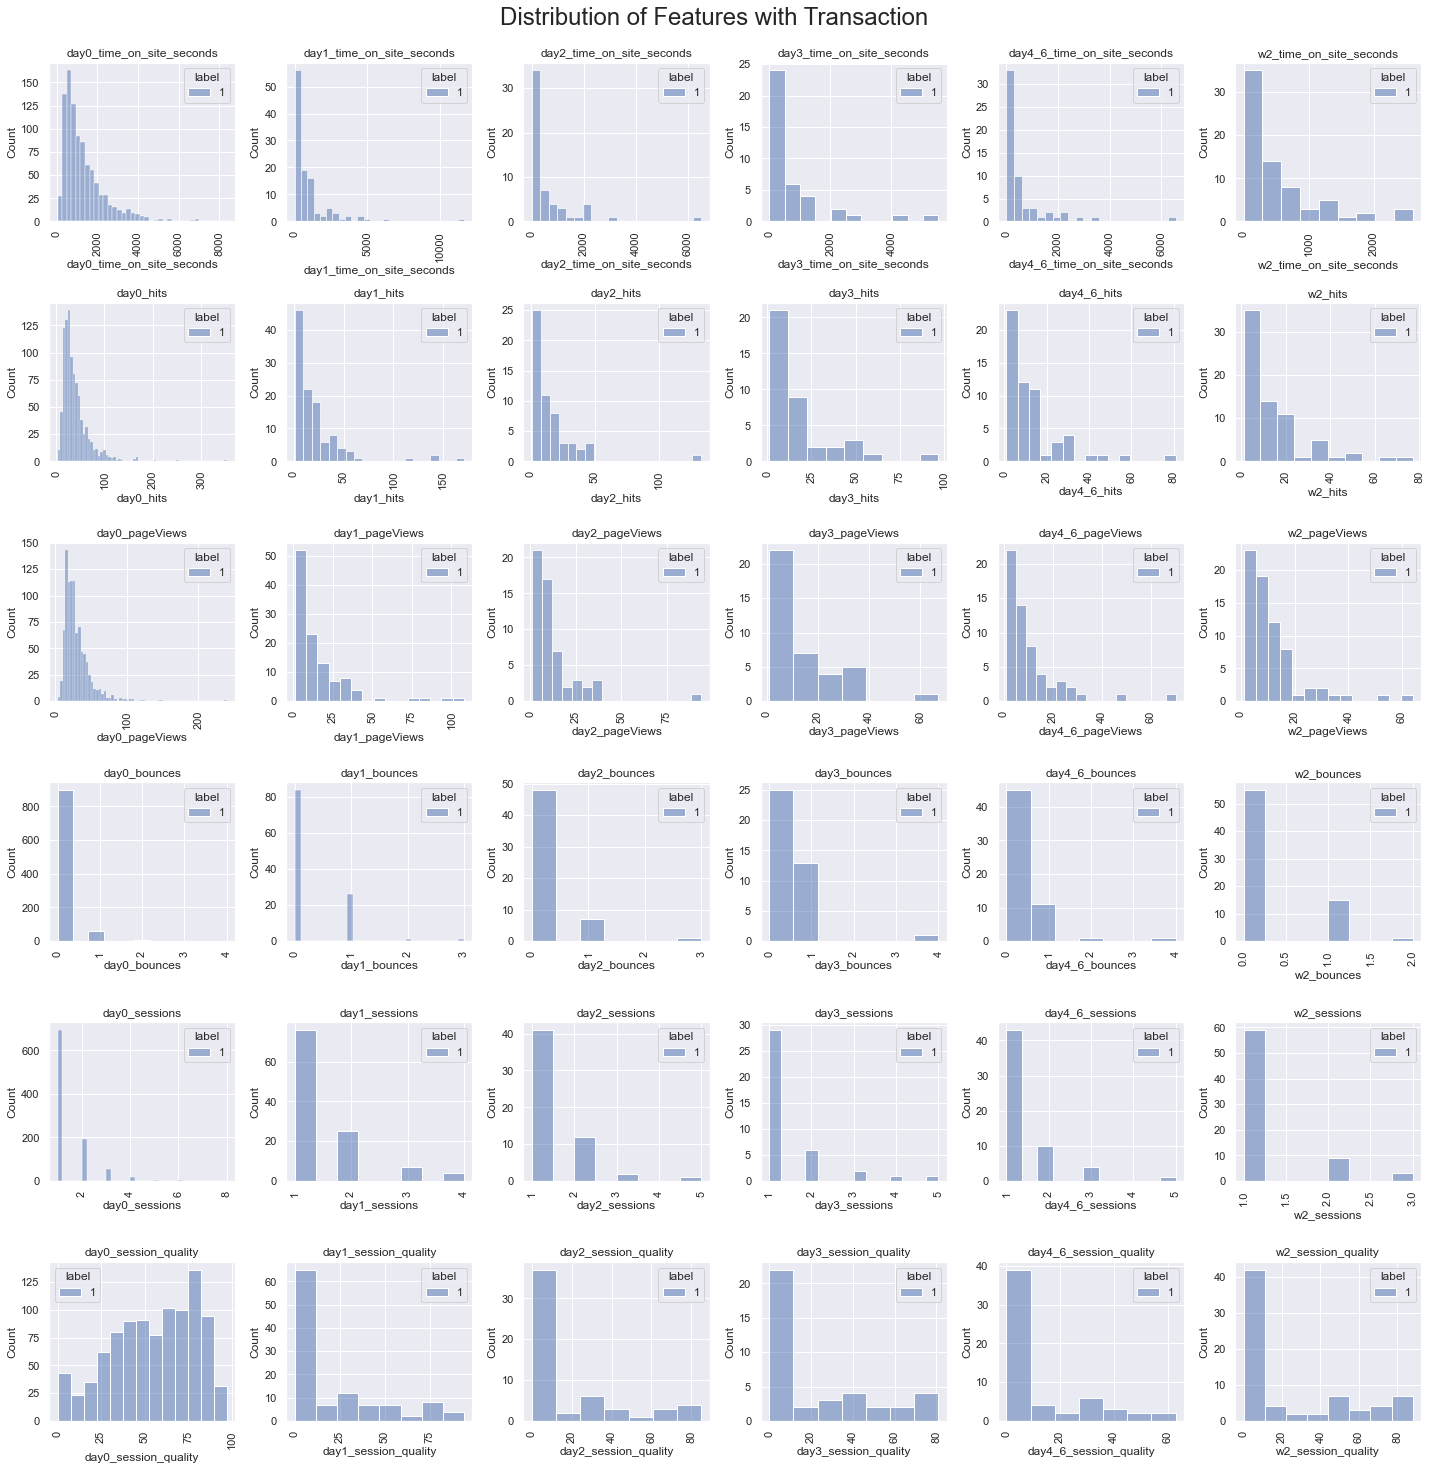

In [9]:
#Look at the distribution of features with transactions or label = 1, exlcluding visitor_id and label
true_label_feats = train[train.label == 1]
title = 'Distribution of Features with Transaction'
plot_hists(true_label_feats, title)

Based on the general overview and distribution of features for users who made purchases, we can see that there are more interactions less than 6 days leading up to the transaction in comparison to the 7-14 days prior.

The time on site, hits, page views, bounces, sessions, and session quality all experience an increase in user interactions, particularly on the day0, day1, and day2 prior to purchase. This intuitively makes sense that users spend more time on the site the day of the transaction. It also makes sense that they spend more and more time on site leading up to the purchase since visitors potentially do research, compare prices, and determine their final decisions.

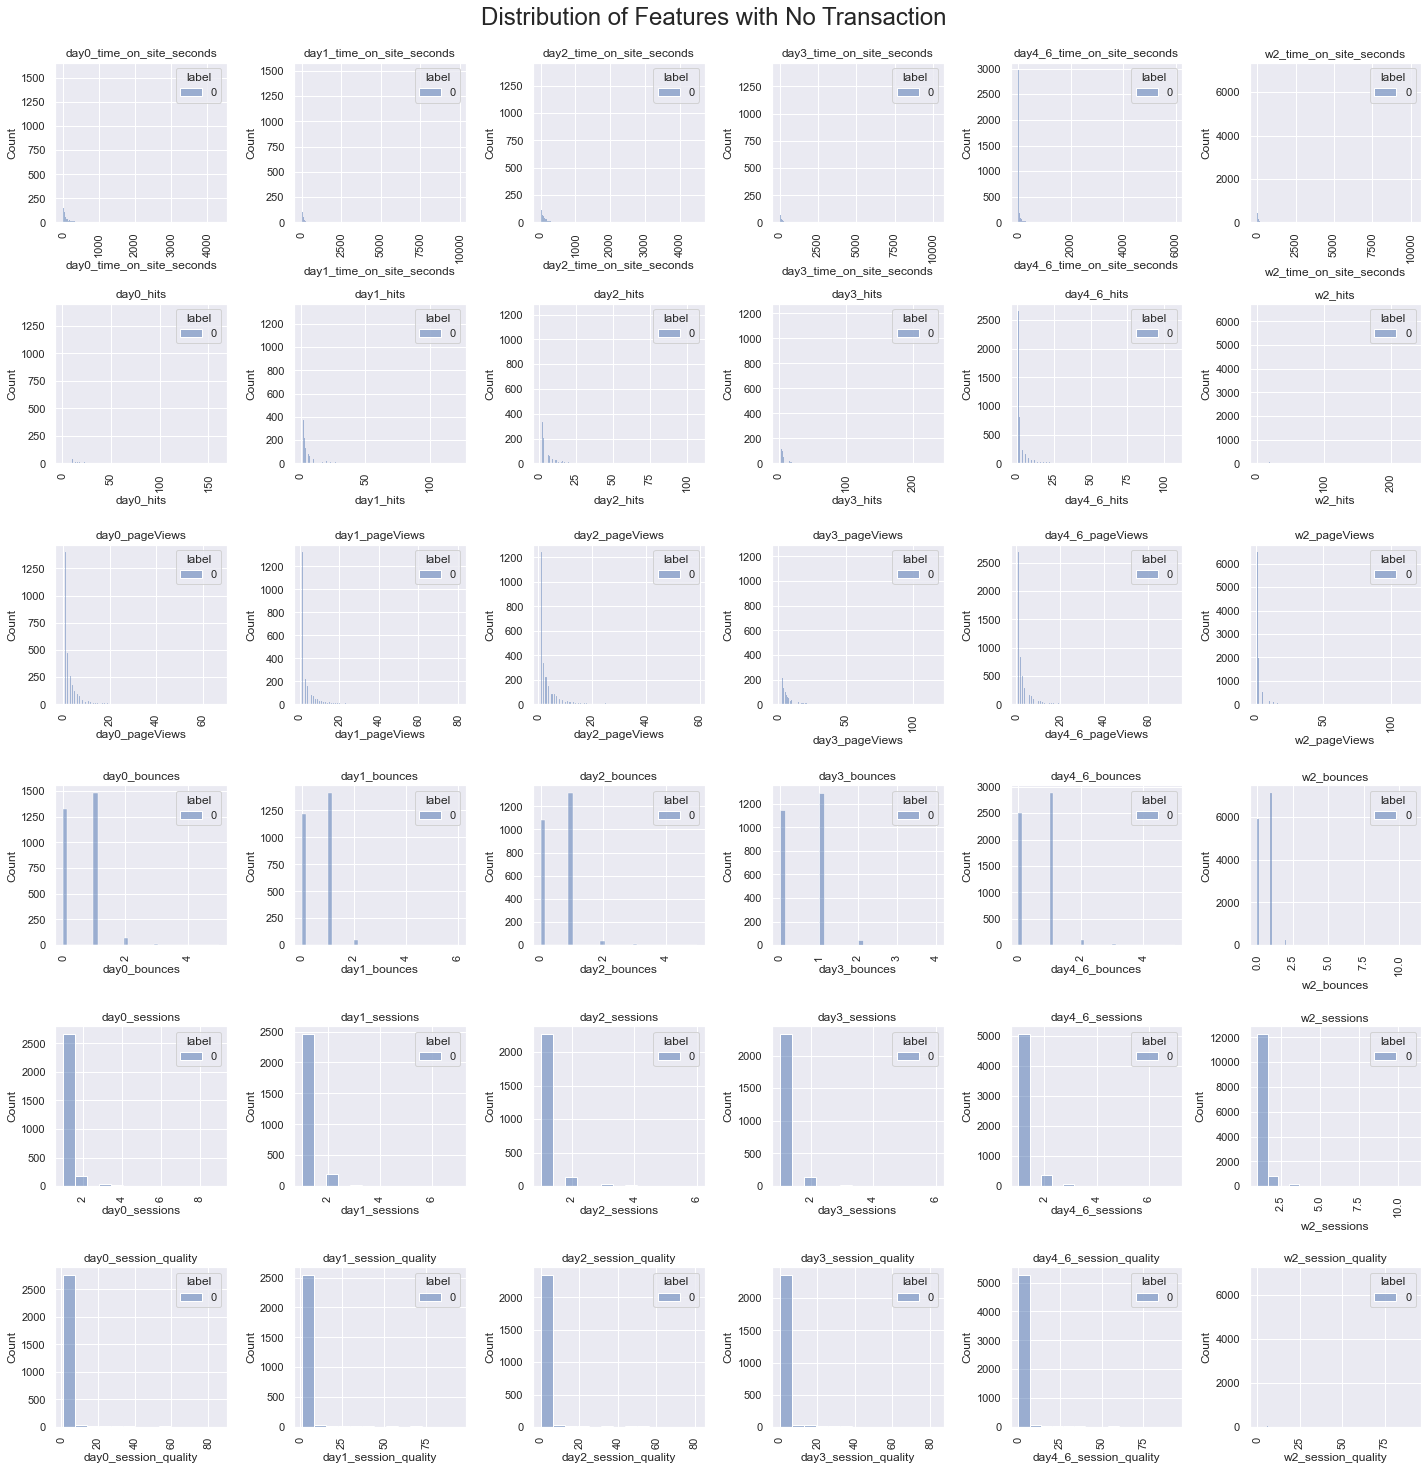

In [10]:
#Look at the distribution of features with no transactions or label = 0, exlcluding visitor_id and label
false_label_feats = train[train.label == 0]
title = 'Distribution of Features with No Transaction'
plot_hists(false_label_feats, title)

Based on the general overview and distribution of features for users who made no purchases as the "transaction" date gets closer, less and interactions are made on site.

The time on site, hits, page views, bounces, sessions, and session quality all experience a slight increase in user interactions, particularly between day0 and day1. However, in comparison to users who made purchases, they drastically spend less time on the website. Interestingly, the total number of bounces per user per day was on average higher for no purchases versus users who made purchases.

This suggest bounces might be a significant indicator in predicting a customer's propensity to purchase.

In [11]:
import seaborn as sns

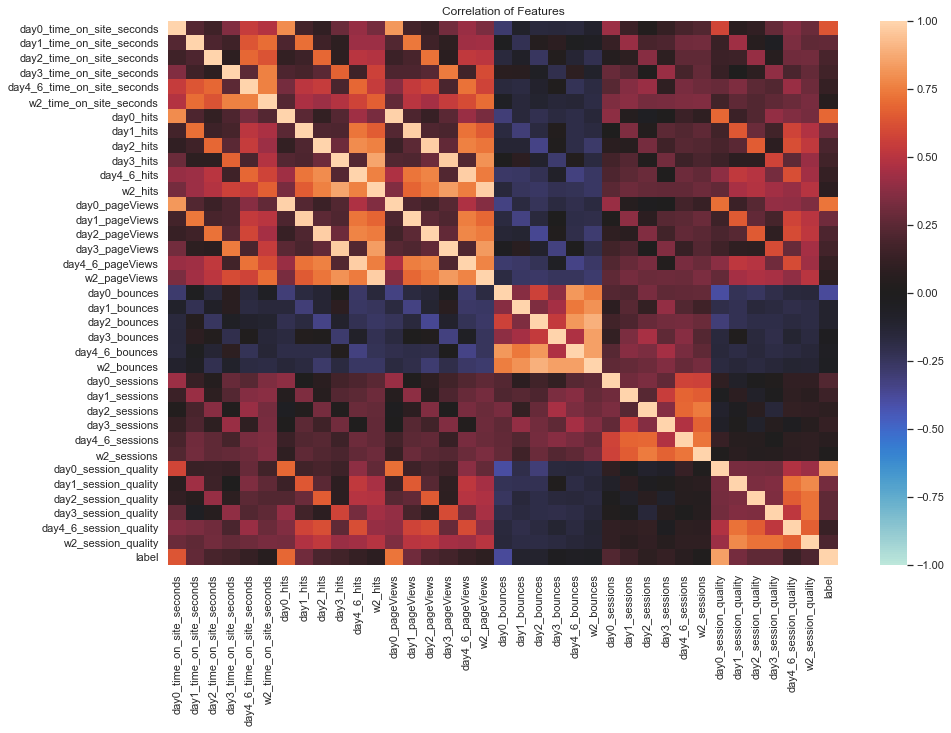

In [12]:
#plot heat map
plt.subplots(figsize=(15,10))
plt.title('Correlation of Features')
sns.heatmap(train.corr(), vmin=-1, vmax=1, center=0)
plt.show()

Based on the heatmap above, hits and page views are very positively correlated. We may need to be aware of multicollinearity for those features. Here we can see that there is a negative correlation between time on site, hits, page views and session quality with bounces.

In [13]:
#compare average of each feature by day and compare false/true feautures together, especially bounces
#cdf, pdf